In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

import joblib
import os

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Impression Logs (data/impression_log.csv)

* imp_id: 노출 아이디
* content_id: 광고 상품 아이디
* server_time_kst: 로그(노출)생성 시간
* bid_price: 광고 상품 입찰가 (PPC)
* user_id: 노출 대상 사용자 아이디 (해쉬)
* device_type: 노출 대상 디바이스 타입



In [ ]:
impression_df = pd.read_csv('/content/drive/MyDrive/data/ad/data/impression_log.csv')

impression_df.head()

,imp_id,content_id,server_time_kst,bid_price,user_id,device_type
0,97cf612d3a7008353958,161592430,2021-08-31T05:07:20.945+09:00,50,11555138,a
1,99d1612d39112085014f,162892746,2021-08-31T05:02:38.277+09:00,50,1310312,a
2,97ca612d461111487741,162806628,2021-08-31T05:57:03.384+09:00,55,76429349,a
3,97f9612d3995149e6b11,161593862,2021-08-31T05:03:49.145+09:00,270,74800572,a
4,97f9612d3a22149eef25,161587624,2021-08-31T05:06:26.494+09:00,50,4454345,a


In [ ]:
impression_df.shape

(852587, 6)

In [ ]:
impression_df['bid_price'].describe()

count    852587.000000
mean         62.133348
std          36.639941
min          50.000000
25%          50.000000
50%          50.000000
75%          60.000000
max         660.000000
Name: bid_price, dtype: float64

## 인사이트 1
content_id와 bid_price, user_id를 조금 더 자세히 살펴볼 필요가 있다.

사실상 이 데이터셋에서는 3개의 column만 유효한 정보값을 가지고 있는 듯하다. 

In [ ]:
impression_df.value_counts()

imp_id                content_id  server_time_kst                bid_price  user_id   device_type
9919612cf5dc1fc54c9f  157880815   2021-08-31T00:14:40.406+09:00  50         5572045   a              4
99d1612dcf5b2207a381  107565407   2021-08-31T15:42:40.763+09:00  50         7385740   a              4
99d1612cf5bd1fd299ab  157880815   2021-08-31T00:14:40.406+09:00  50         5572045   a              4
99d1612dcf5b2207a386  162258772   2021-08-31T15:42:40.763+09:00  50         7385740   a              4
971a612d5b400d15d276  143797147   2021-08-31T07:27:15.595+09:00  50         5428395   a              3
                                                                                                    ..
9919612dd4dd220f9e55  160630155   2021-08-31T16:06:24.344+09:00  50         75204035  a              1
9919612dd4dd220f9e50  159897047   2021-08-31T16:06:19.798+09:00  50         75204035  a              1
9919612dd4dd220f9e4b  163230739   2021-08-31T16:06:19.798+09:00  50         75

In [ ]:
# group by를 사용하여 content_id, bid_price별로 확인하고 높은 빈도수의  bid 오름차순으로 정렬해 가져왔다.
# 어떤 content_id의 항목들이 큰 비중을 차지하고 있는지 알 수 있다.
impression_df.groupby(['content_id','bid_price',])['bid_price'].count().sort_values().tail(30)

content_id  bid_price
162188354   60            2369
162414349   50            2411
159842308   50            2489
163081509   50            2491
162194322   55            2497
136922144   50            2505
150570385   50            2625
162337365   50            2708
162188121   60            2824
157880815   50            2910
139971377   50            3041
158260898   50            3174
143797147   65            3208
131022694   50            3445
162521007   50            3507
161659993   55            3553
143797147   50            3680
162194690   55            3680
146485304   55            3822
143797147   70            3959
55080864    50            4050
162247771   50            4064
            55            4547
162188680   60            4613
162520302   50            4710
73171724    50            5036
162194740   55            5874
146485304   75            6282
162188490   60            7724
162523203   50           12837
Name: bid_price, dtype: int64

In [ ]:
impression_check = impression_df[impression_df.content_id == 162523203]

In [ ]:
impression_check.head(30)

,imp_id,content_id,server_time_kst,bid_price,user_id,device_type
72,99d1612d3ce42088a64a,162523203,2021-08-31T05:17:44.428+09:00,50,1310312,a
131,97f9612d426914a6f376,162523203,2021-08-31T05:41:34.826+09:00,50,4812304,a
170,97cf612d3aad0835770d,162523203,2021-08-31T05:08:54.044+09:00,50,5703144,a
197,97ca612d443111469059,162523203,2021-08-31T05:49:39.609+09:00,50,1190445,a
243,97cf612d3c350836e86b,162523203,2021-08-31T05:14:51.674+09:00,50,1310312,a
318,9919612d43d3208235ba,162523203,2021-08-31T05:47:18.679+09:00,50,6369936,a
362,971a612d3ed20cf453ca,162523203,2021-08-31T05:26:03.182+09:00,50,7781540,a
439,97ca612d4192114420b6,162523203,2021-08-31T05:37:43.075+09:00,50,4909464,a
645,99d1612d3a3f208620f6,162523203,2021-08-31T05:07:54.968+09:00,50,75438306,a
678,97ca612d3d2e11400740,162523203,2021-08-31T05:18:58.747+09:00,50,5703144,a


## 인사이트 2

content_id에는 중복이 많다. (같은 content_id를 공유하는 데이터들이 많다.)

다시 말해, 한개의 광고 상품이 여러 유저들에게 보여지는 식이다. (당연한 소리긴 하지만)

또한, 한 상품의 bid_price는 대부분 비슷하며(거의 같으며), 

특징적인 점은 한 상품에 노출되는 user_id의 중복도가 높다는 것이다. 

다시 말해. 한 상품군에 관심이 높은, 어떤 특징을 가지는 유저의 집단이 존재한다는 것. 

In [ ]:
impression_df.sort_values(by=['bid_price'] ,ascending=False).head(50)

,imp_id,content_id,server_time_kst,bid_price,user_id,device_type
526349,9919612d7a3f20e21f32,145954335,2021-08-31T09:39:31.297+09:00,660,1668136,a
809002,99d1612e38d123ee63ac,145954335,2021-08-31T23:12:37.202+09:00,660,7050591,a
55884,99d1612d698420c79230,145954335,2021-08-31T08:28:10.067+09:00,660,11648532,a
544501,97f9612d7a0215078607,145954335,2021-08-31T09:38:30.681+09:00,660,1668136,a
496382,971a612dbaef0e298f1c,145954335,2021-08-31T14:15:31.965+09:00,660,11394343,a
817387,97f9612e39201808f138,145954335,2021-08-31T23:13:56.139+09:00,660,74753703,a
477299,97f9612dbb2f15d8f808,145954335,2021-08-31T14:16:56.930+09:00,660,11394343,a
467989,971a612dbaef0e298f21,145954335,2021-08-31T14:16:22.054+09:00,660,11394343,a
819248,99d1612e38d123ee63b1,145954335,2021-08-31T23:12:41.753+09:00,660,7050591,a
65566,97cf612d6a9b087925af,145954335,2021-08-31T08:32:48.849+09:00,660,11648532,a


## 의문

* 의문 1. 어째서 높은 bid 의 빈도수가 적은 것일까?
* 의문 2. 높은 bid에 해당하는 상품은(상품 카테고리) 대체 무엇일까?
* 의문 3. 높은 bid 의 광고를 봐주는 유저는 어떤 특징을 가지고 있는가?

# View (Click) Logs (data/view_log.csv)
* imp_id: 노출 아이디
* server_time_kst: 로그(뷰) 생성 시간
* bid_price: 클릭된 광고 상품 입찰가 (PPC)
* device_type: 클릭 대상 디바이스 타입

In [ ]:
view_df = pd.read_csv('/content/drive/MyDrive/data/ad/data/view_log.csv')
view_df.head()

,imp_id,server_time_kst,bid_price,device_type
0,99d1612dded122458e99,2021-08-31T16:56:46.013+09:00,50,a
1,998c612ddab9008cceee,2021-08-31T16:32:01.533+09:00,385,a
2,998c612dd77f007f2d67,2021-08-31T16:17:26.423+09:00,50,a
3,971a612ddff00eb50a47,2021-08-31T16:53:48.436+09:00,70,a
4,971a612ddd140ea93f30,2021-08-31T16:41:29.857+09:00,155,a


In [ ]:
view_df.shape

(27006, 4)

##의문

* server_time_kst 로그(뷰) 생성 시간이 과연 의미있는 데이터일까?
* 어떻게 써먹을 수 있을까?

In [ ]:
view_df['bid_price'].describe()

count    27006.000000
mean        63.070244
std         44.360295
min         50.000000
25%         50.000000
50%         50.000000
75%         60.000000
max        415.000000
Name: bid_price, dtype: float64

## 인사이트

impression_df['bid_price'].describe() 에서는 max가 660이었다.
 
그런데 View (Click) Logs에서는 max bid가 415이다.
 
두 개의 데이터셋은 뭐가 다른 거지? 


* 페이지뷰(PageView) 의 광고효과를 측정할 때는 '임프레션(Impression)'이라는 용어를 사용한다. 

* View (Click) Logs 와는 그 부분에서 차이가 있겠구나! 

그렇다면 두 개의 데이터셋은 함부로 merge해서 보면 안된다는 사실을 파악할 수 있다. 

*** 예외적으로 'imp_id' 중심으로는 합쳐서 볼 수 있을지도 모른다. 분명히 중복될 것이다. (확인은 아직 안 해봤음)

***** 하지만 여전히 노출 아이디(imp_id)가 무슨 의미인지는 잘 모르겠다.



In [ ]:
view_df.groupby(['imp_id','bid_price',])['bid_price'].count().sort_values().tail(30)

imp_id                bid_price
97cf612d114307ef7b5a  50           4
97f9612e3bfd18198736  85           4
99d1612d920f2136d2cf  50           4
97cf612d884208c6776e  50           4
99d1612d81602102b29a  65           4
971a612db62e0e19342e  70           4
97cf612dda1809e20444  50           4
99d1612d7f5e20fcf7df  55           4
9919612e427d24179753  375          4
97cf612e283f0b3c70cb  55           4
97f9612e2732179f244c  50           4
99d1612e371d23e491c9  50           4
97f9612dd3ff16327e22  50           4
99d1612dae4e2194b2d2  70           4
971a612d17bc0cbab1ce  70           4
97cf612dc2fa098b1e04  50           4
97ca612cf6bf108e9ff1  50           4
9919612dd23b22062706  60           4
998c612df58e00f7f476  50           4
97cf612e177c0ae305b3  385          5
97cf612d8f0808dbff66  50           5
9919612d8c1221164d71  50           5
99d1612db0ff219dfdbe  60           5
97ca612d1c5111129247  50           5
97f9612df93716c6cf38  60           5
971a612e005d0f35467c  65           5
971a61

앞서 본 Impression Logs 데이터셋보다, 'bid_price'별 중복도가 상대적으로 낮다.

In [ ]:
view_df.sort_values(by=['bid_price'] ,ascending=False).head(50)

,imp_id,server_time_kst,bid_price,device_type
2020,971a612d00c20c70c019,2021-08-31T01:01:29.135+09:00,415,a
7418,97f9612d02161425808a,2021-08-31T01:07:05.938+09:00,415,a
1174,97ca612cf6c5108ec234,2021-08-31T00:18:52.321+09:00,415,a
20903,971a612cf6080c3d2ece,2021-08-31T00:15:27.440+09:00,415,a
12995,99d1612cf9281fe42457,2021-08-31T00:29:32.739+09:00,415,a
13361,99d1612cfa8b1feb2f53,2021-08-31T00:36:11.708+09:00,415,a
10426,9919612d86352103e392,2021-08-31T10:30:57.448+09:00,410,a
12023,9919612d450e20838065,2021-08-31T05:52:39.883+09:00,410,a
14399,971a612d23060cd196ee,2021-08-31T03:27:33.197+09:00,410,a
16826,97cf612d4da6084816bf,2021-08-31T06:29:16.721+09:00,410,a


## 인사이트

View (Click) Logs에서의 클릭된 광고 상품 입찰가 (PPC) 가,  Impression Logs의 광고 상품 입찰가 (PPC)보다 낮은 편이다.

이러한 차이가 나는 이유는 모르겠지만, 데이터상으로는 유의미한 인사이트를 도출해낼 수 있을 것이다. 

### 아이디어 1
Impression Logs와 Click view를 함부로 합쳐선 안 된다 (일단 bid_price라는 colums이 중복된다.)

하지만 imp_id로는 합쳐볼 수 있을 것이다.

그렇다면 click_bid_price라는 새 column으로 bid_price 를 넘겨서, 합쳐보면......

페이지 노출도 되고, 추가적으로 클릭까지 된 상품군(content_id)을 알 수 있지 않을까? 

-

여기서 잠깐! 

> imp_id는 '광고 요청'이 들어간 후 실질적으로 광고가 송출되는 시점에 생겨나는 session 식별 id 같은 것이다. (웹 크롤링 당시를 떠올려보면 이해가 될 것) 

> *실제 Impression ID는 광고 요청 이후에 광고가 노출 되고나서야 생긴다.
해당 API 호출에서 중요한 요점은 각각의 ad-request에 대해서 sessionID가 생긴다는 것..... (중략)* 출처 : 
https://adnetwork.tistory.com/21 

1.Click view의 bid_price column명을 바꾼다
2. imp_id 기준으로 합친다
3. 합쳐진다면, 합쳐진 것들의 content_id를 체크한다. 

(사실상 Click view에 해당하는 모든 content_id를 집중적으로 보면 될 것이다.) 

In [ ]:
view_df.rename(columns = {'bid_price' : 'click_bid_price'}, inplace = True)

In [ ]:
Impression_n_view_df = pd.merge(impression_df, view_df, on='imp_id', how='left')

In [ ]:
Impression_n_view_df.head()

,imp_id,content_id,server_time_kst_x,bid_price,user_id,device_type_x,server_time_kst_y,click_bid_price,device_type_y
0,97cf612d3a7008353958,161592430,2021-08-31T05:07:20.945+09:00,50,11555138,a,NaN,NaN,NaN
1,99d1612d39112085014f,162892746,2021-08-31T05:02:38.277+09:00,50,1310312,a,NaN,NaN,NaN
2,97ca612d461111487741,162806628,2021-08-31T05:57:03.384+09:00,55,76429349,a,NaN,NaN,NaN
3,97f9612d3995149e6b11,161593862,2021-08-31T05:03:49.145+09:00,270,74800572,a,NaN,NaN,NaN
4,97f9612d3a22149eef25,161587624,2021-08-31T05:06:26.494+09:00,50,4454345,a,NaN,NaN,NaN


In [ ]:
view_df.isnull().sum()

imp_id             0
server_time_kst    0
click_bid_price    0
device_type        0
dtype: int64

In [ ]:
impression_df.isnull().sum()

imp_id             0
content_id         0
server_time_kst    0
bid_price          0
user_id            0
device_type        0
dtype: int64

In [ ]:
Impression_n_view_df.isnull().sum()

imp_id                    0
content_id                0
server_time_kst_x         0
bid_price                 0
user_id                   0
device_type_x             0
server_time_kst_y    827671
click_bid_price      827671
device_type_y        827671
dtype: int64

In [ ]:
Impression_n_view_df.shape

(854241, 9)


impression_df 총 852587개 columm.
view_df 총 27006개 columm.

> 일단 merge는 되긴 한다. imp_id 에도 결측값이 없다. 교집합이 되는 데이터셋이긴 하다는 것. 

따라서 Click view에 해당하는 모든 content_id는 페이지에 노출되기도 했고, 거기에 더해 클릭까지 된 상품이라고 볼 수 있다!!!

In [ ]:
#일단 결측치는 0으로 메워준다.

Impression_n_view_df.fillna(0)

,imp_id,content_id,server_time_kst_x,bid_price,user_id,device_type_x,server_time_kst_y,click_bid_price,device_type_y
0,97cf612d3a7008353958,161592430,2021-08-31T05:07:20.945+09:00,50,11555138,a,0,0.0,0
1,99d1612d39112085014f,162892746,2021-08-31T05:02:38.277+09:00,50,1310312,a,0,0.0,0
2,97ca612d461111487741,162806628,2021-08-31T05:57:03.384+09:00,55,76429349,a,0,0.0,0
3,97f9612d3995149e6b11,161593862,2021-08-31T05:03:49.145+09:00,270,74800572,a,0,0.0,0
4,97f9612d3a22149eef25,161587624,2021-08-31T05:06:26.494+09:00,50,4454345,a,0,0.0,0
...,...,...,...,...,...,...,...,...,...
854236,9919612e429a24183e0d,163247160,2021-08-31T23:54:23.433+09:00,50,7660589,a,0,0.0,0
854237,998c612e425a027cdb47,78159183,2021-08-31T23:54:17.029+09:00,65,3735841,a,0,0.0,0
854238,9919612e429724183042,152627901,2021-08-31T23:54:24.948+09:00,70,9140358,a,2021-08-31T23:54:31.027+09:00,70.0,a
854239,97f9612e4295183f6e39,160836652,2021-08-31T23:54:20.398+09:00,165,1668136,a,0,0.0,0


### 아이디어 2

우리는 Impression Logs와 Click view,  두개의 데이터셋에 대해 

광고 상품 입찰가 빈도 그래프를 따로 그려볼 필요가 있다.  (따로 혹은 겹쳐서. countplot등으로)  

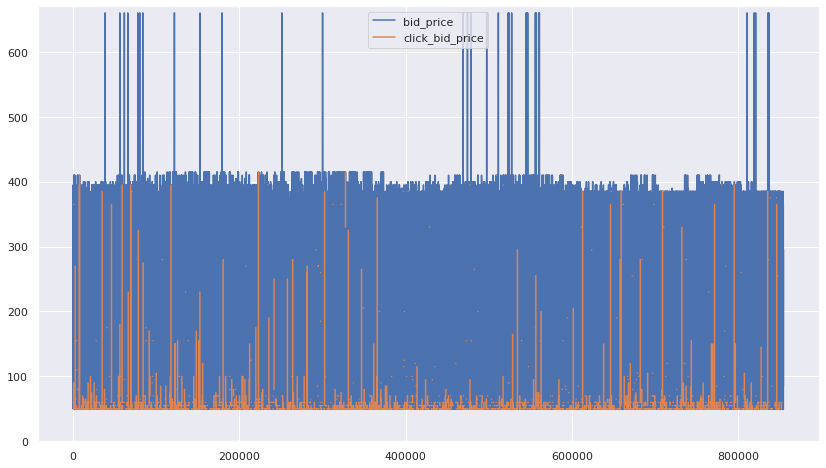

In [ ]:
%matplotlib inline 
Impression_n_view_df.plot(y=['bid_price', 'click_bid_price'], ylim=(0, 670), figsize=(14, 8), grid=True,)


위 plot은 bid_price와 click_bid_price의 분포를 가시화한 것이다.
(빈도와는 관련이 없다) 

### 나중에 건드려보기

gropby 를 통해  bid_price 높은 순으로 정렬하기. (높은 가격이 얼만큼의 빈도를 지닐 지 궁금해서)

# User (data/viewer.csv)
- user_id: 클릭한 사용자 아이디 (해쉬)
- gender: 클릭한 사용자 성별 (0은 비공, 1은 여자, 2는 남자)
- age: 클릭한 사용자 나이
- following_cnt: 상품 노출 대상의 팔로잉 수
- pay_count: 상품 노출 대상의 거래수
- parcel_post_count: 상품 노출 대상의 택배 거래수
- transfer_count: 상품 노출 대상의 송금 거래수

In [ ]:
viewer_df = pd.read_csv('/content/drive/MyDrive/data/ad/data/viewer.csv')
viewer_df.head()

,user_id,gender,age,following_cnt,pay_count,parcel_post_count,transfer_count,chat_count
0,513808,2,48,0,0,0,0,0
1,10764680,1,25,0,0,0,0,0
2,516424,0,0,1,0,0,0,0
3,10248440,1,36,14,0,0,0,0
4,9741736,1,30,2,0,0,0,0


이 데이터셋은 Click view와 긴밀한 연관이 있음을 알 수 있다.


In [ ]:
#paycount 높은 순 정렬

viewer_df.sort_values(by=["pay_count"], ascending=[True]) 

,user_id,gender,age,following_cnt,pay_count,parcel_post_count,transfer_count,chat_count
0,513808,2,48,0,0,0,0,0
34550,77033865,1,43,0,0,0,0,0
34551,77316915,1,17,0,0,0,0,0
34553,2618144,1,25,2,0,0,0,5
34554,2704751,2,29,0,0,2,0,0
...,...,...,...,...,...,...,...,...
54481,10895632,2,38,2,759,0,0,0
34476,1462217,1,34,19,942,0,57,11
26700,3682152,1,38,2,1088,231,298,41
50288,1494515,1,34,24,1361,0,44,1465


In [ ]:
viewer_df["pay_count"].sum()

75995

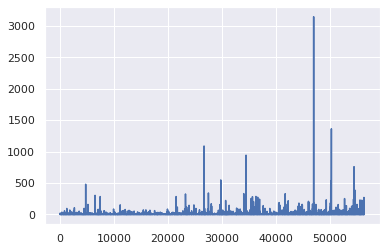

In [ ]:
viewer_df["pay_count"].plot()

정말 특이하게도 눈에 띄는 몇 명의 열성 유저들이 있다는 것을 알 수 있다.

정말 현업에서 쓰는 데이터인지 약간 의심이 든다. . . 

# Task 에 대한 고민

1. 누굴 위한 Taks인가? 를 가장 먼저 정의해야 할 것이다.

번개장터의 데이터를 쓰지만, 
* 단지 소스의 출처일 것인지
* 혹은 프로젝트의 결과물이 번개장터를 위한 것이고, 번개장터 내에서 쓰일 것인지 

정해야 한다.
 
 

 
 
2. 번개장터의 특성

중고/새 물건의  판매↔구매자 가 모이는 플랫폼.

광고수익이 거의 대부분의 BM.

자세히 살펴보면 샵인샵 느낌도 강하다.

그러므로 bid price보다는 안에서 활동하고 있는 유저들에 대한 정보가 더 중요할 수도 있겠다. (카드사 데이터에서 유저 정보가 중요하듯이)

어떤 연령대의, 어떤 성별의 유저가 어떤 시즌에 '어떤 상품'에 관심이 많은지의 데이터를 수집할 수 있다면 그것도 좋은 인사이트가 될 것 같다. 